In [1]:
#Code for web scraping
#
#

from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import linear_model


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)



In [3]:
authors=[]
dates=[]
statements=[]
sources=[]
targets=[]
articles=[]

In [4]:
def scrape_website(page_number):
  page_num=str(page_number)
  URL='https://www.politifact.com/factchecks/list/?page='+page_num
  webpage=requests.get(URL)
  soup=BeautifulSoup(webpage.text,'html.parser')
  statement_footer=soup.find_all('footer',attrs={'class':'m-statement__footer'})
  statement_quote=soup.find_all('div',attrs={'class':'m-statement__quote'})
  statement_meta=soup.find_all('div',attrs={'class':'m-statement__meta'})
  statement_article=soup.find_all('article',attrs={'class':'m-textblock'})
  target=soup.find_all('div',attrs={'class':'m-statement__meter'})



  for i in statement_footer:
    link1=i.text.strip()
    name_and_date=link1.split()
    first_name=name_and_date[1]
    last_name=name_and_date[2]
    full_name=first_name+' '+last_name
    month=name_and_date[4]
    day=name_and_date[5]
    year=name_and_date[6]
    date=month+' '+day+' '+year
    dates.append(date)
    authors.append(full_name)


  for i in statement_quote:
    link2=i.find_all('a')
    statement_text=link2[0].text.strip()
    statements.append(statement_text)


  for i in statement_meta:
    link3=i.find_all('a')
    source_text=link3[0].text.strip()
    sources.append(source_text)

  # for i in statement_article:
  #   link5=i.find('p')
  #   #article_text=link5[0].text.strip()
  #   articles.append(link5)
 

  for i in target:
    link4=i.find('div',attrs={'class','c-image'}).find('img').get('alt')
    targets.append(link4)



In [5]:
n=100
for i in range(1,n):
  scrape_website(i)

In [6]:
def getBinaryNumTarget(text):
  text1=text.lower()
  if text1=='true':
    return 5
  elif text1=='mostly-true':
    return 4
  elif text1=='half-true':
    return 3
  elif text1=='barely-true':
    return 2
  elif text1=='mostly-false':
    return 1
  else:
    return 0

In [19]:
data=pd.DataFrame(columns=['author','statement','source','date','target'])
data['author']=authors
data['statement']=statements
data['source']=sources
data['date']=dates
data['target']=targets
#data['article']=articles
print(data['statement'].iloc[1])

“Only about 20%” of people who apply for asylum qualify for it.


In [27]:
data['BinaryTarget']=data['target'].apply(getBinaryNumTarget)
data

,author,statement,source,date,target,BinaryTarget
0,Maria Ramirez,The border wall and the ‘Remain in Mexico’ pol...,Mike Pence,"• December 6,",false,0
1,Maria Ramirez,“Only about 20%” of people who apply for asylu...,Jeh Johnson,"• December 6,",false,0
2,Gabrielle Settles,The 2021 infrastructure bill requires all new ...,Instagram posts,"December 5, 2022",barely-true,2
3,Gabrielle Settles,Hitler “didn’t kill 6 million Jews” and “the H...,Kanye West,"December 5, 2022",pants-fire,0
4,Vanessa Swales,“Wisconsin elementary school students buck nat...,Jill Underly,"December 5, 2022",barely-true,2
...,...,...,...,...,...,...
2965,Samantha Putterman,A photo shows a recent White House event was a...,Facebook posts,"March 17, 2021",pants-fire,0
2966,Ciara O'Rourke,“Actor Tom Hanks has passed away age 63.”,Viral image,"March 17, 2021",pants-fire,0
2967,Daniel Funke,Says Joe Biden is “now saying he inherited ‘a ...,Facebook posts,"March 17, 2021",false,0
2968,Ciara O'Rourke,"Says Kamala Harris said, “We will be shutterin...",Viral image,"March 17, 2021",pants-fire,0


In [28]:
data.to_csv('politicalfactschecker.csv')

#
#End of web scraping code

In [ ]:


true = pd.read_csv("/content/True.csv")
true['target'] = 'true'
true['BinaryTarget']=true['target'].apply(getBinaryNumTarget)
true.head()



In [29]:
 data = pd.read_csv('/content/politicalfactschecker.csv')
 data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
 data.head()

,author,statement,source,date,target,BinaryTarget
0,Maria Ramirez,The border wall and the ‘Remain in Mexico’ pol...,Mike Pence,"• December 6,",false,0
1,Maria Ramirez,“Only about 20%” of people who apply for asylu...,Jeh Johnson,"• December 6,",false,0
2,Gabrielle Settles,The 2021 infrastructure bill requires all new ...,Instagram posts,"December 5, 2022",barely-true,2
3,Gabrielle Settles,Hitler “didn’t kill 6 million Jews” and “the H...,Kanye West,"December 5, 2022",pants-fire,0
4,Vanessa Swales,“Wisconsin elementary school students buck nat...,Jill Underly,"December 5, 2022",barely-true,2


In [30]:
data.dtypes
data.shape
p5=data['BinaryTarget'].value_counts()[5]

In [31]:
p4=data['BinaryTarget'].value_counts()[4]

In [32]:
p3=data['BinaryTarget'].value_counts()[3]

In [33]:
p2=data['BinaryTarget'].value_counts()[2]


In [15]:
p1=data['BinaryTarget'].value_counts()[1]

KeyError: ignored

In [34]:
p0=data['BinaryTarget'].value_counts()[0]

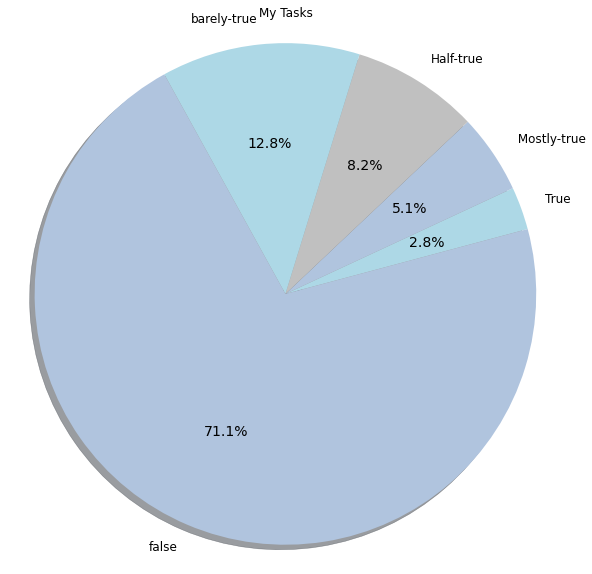

In [35]:
# cat_tar=pd.get_dummies(data.BinaryTarget)[0]
# label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]
# plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')





import matplotlib.pyplot as plt

my_data = [p5, p4, p3,p2,p0]
my_labels = 'True', ' Mostly-true','Half-true','barely-true','false'
my_colors = ['lightblue', 'lightsteelblue', 'silver']
#my_explode = (0, 0.1, 0,)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow=True, colors=my_colors)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

In [36]:
data.shape

(2970, 6)

In [38]:
df1 = data.fillna('')

In [39]:
data.isnull().sum() 
df1['content'] = df1['author'] + ' ' + df1['source']
df1.head()

,author,statement,source,date,target,BinaryTarget,content
0,Maria Ramirez,The border wall and the ‘Remain in Mexico’ pol...,Mike Pence,"• December 6,",false,0,Maria Ramirez Mike Pence
1,Maria Ramirez,“Only about 20%” of people who apply for asylu...,Jeh Johnson,"• December 6,",false,0,Maria Ramirez Jeh Johnson
2,Gabrielle Settles,The 2021 infrastructure bill requires all new ...,Instagram posts,"December 5, 2022",barely-true,2,Gabrielle Settles Instagram posts
3,Gabrielle Settles,Hitler “didn’t kill 6 million Jews” and “the H...,Kanye West,"December 5, 2022",pants-fire,0,Gabrielle Settles Kanye West
4,Vanessa Swales,“Wisconsin elementary school students buck nat...,Jill Underly,"December 5, 2022",barely-true,2,Vanessa Swales Jill Underly


In [40]:
stemmer = PorterStemmer()
import nltk
nltk.download()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content) #1
    stemmed_content = stemmed_content.lower() #2
    stemmed_content = stemmed_content.split() #3
    stemmed_content = [stemmer.stem(word) for word in stemmed_content 
if not word in stopwords.words('english')] #4
    stemmed_content = ' '.join(stemmed_content) #5
    return stemmed_content #6

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [41]:
df1['statement'] = df1['statement'].apply(stemming)
df1['statement'].head()

0    border wall remain mexico polici reduc illeg i...
1                           peopl appli asylum qualifi
2    infrastructur bill requir new vehicl kill swit...
3             hitler kill million jew holocaust happen
4    wisconsin elementari school student buck natio...
Name: statement, dtype: object

In [57]:
X = df1.statement.values
y = df1.BinaryTarget.values

In [58]:
X = tfidfvectorizer.fit_transform(X)

In [62]:
df_tfidfvect = pd.DataFrame(data = X.toarray(),columns = tfidf_tokens)

In [63]:
df_tfidfvect.head()

,aaron,aarp,ab,abandon,abbi,abbott,abc,abduct,abe,abet,...,zelenskyy,zero,zimbabw,zionist,zombi,zone,zoo,zoom,zoonot,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_temp = pd.DataFrame(X)

In [52]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [59]:
tfidf_tokens = tfidfvectorizer.get_feature_names()

In [47]:
X_temp.dtypes

0    object
dtype: object

In [45]:
print(X_temp.head())

                                                   0
0    (0, 2180)\t0.33734052599818837\n  (0, 2169)\...
1    (0, 3563)\t0.5306486393762689\n  (0, 298)\t0...
2    (0, 2187)\t0.30198121899187635\n  (0, 1373)\...
3    (0, 1998)\t0.3857282767194689\n  (0, 2091)\t...
4    (0, 3688)\t0.2611437711424723\n  (0, 681)\t0...


In [46]:
print(y)

[0 0 2 ... 0 0 3]


In [183]:
df_data = data[['author', 'source', 'date', 'BinaryTarget']]
df_data = pd.concat([df_data, X_temp])

In [184]:
#y = df_data['BinaryTarget']

In [64]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

(1782, 4912)
(594, 4912)
(1782,)
(594,)
(594, 4912)
(594,)


In [103]:
# seq_len = [len(i.split()) for i in X_train]

# pd.Series(seq_len).hist(bins = 40,color='firebrick')
# plt.xlabel('Number of Words')
# plt.ylabel('Number of texts')

In [65]:
model = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [68]:
# X_train_prediction = model.predict(X_train)
# training_accuracy = accuracy_score(X_train_prediction, y_train)
# print(training_accuracy)

print('Predicted value:',model.predict(X_test[593]))
print('Actual Value:',y_test[593])

Predicted value: [0]
Actual Value: 0


In [69]:
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, y_test)
print(testing_accuracy)

0.7070707070707071


In [76]:
X_sample = X_test[0]
prediction = model.predict(X_test)
# if prediction == 0:
#     print('The NEWS is Real!')
# else:
#     print('The NEWS is Fake!')

In [70]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from yellowbrick import ROCAUC

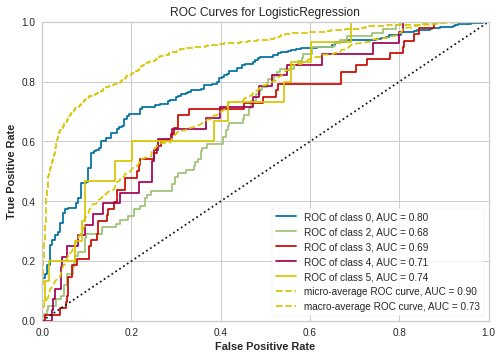

In [74]:
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

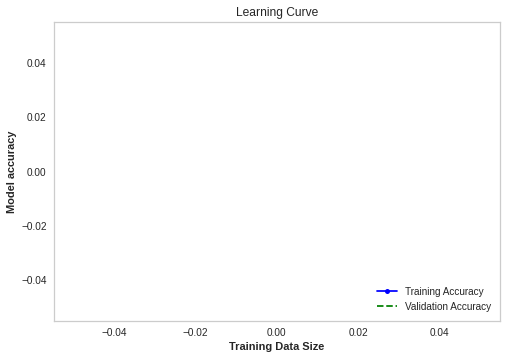

In [196]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [77]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[420   0   0   0   0]
 [ 83   0   0   0   0]
 [ 48   0   0   0   0]
 [ 28   0   0   0   0]
 [ 15   0   0   0   0]]


In [210]:
 def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
        if xyticks==False:
        #Do not show categories if xyticks is False
          categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf.pdf')  

    if title:
        plt.title(title)

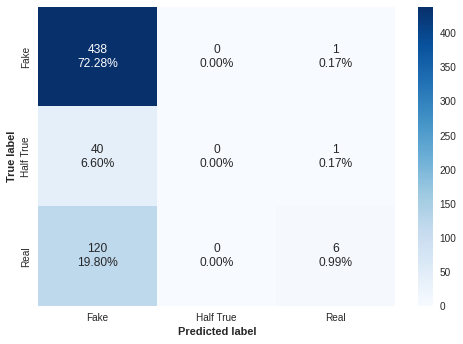

In [211]:
# import seaborn as sns
# ax = sns.heatmap(cm, annot=True, fmt = 'g')
# #ax.pltticks



  
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Fake','Half True' ,'Real']

cf_matrix = confusion_matrix(y_test, prediction)
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='Blues')

In [212]:
from sklearn import metrics

In [213]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       439
           1       0.00      0.00      0.00        41
           2       0.75      0.05      0.09       126

    accuracy                           0.73       606
   macro avg       0.49      0.35      0.31       606
weighted avg       0.69      0.73      0.63       606



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
